In [1]:
import pandas as pd
import ast
import os

In [2]:
fname = "results_new_deep"
fname = "results_new_gcn_all"
fname = "results_new_layerprops"
# fname = "results_new_max"
fname = 'results_new_gated_gcn_again'
fname = 'results_deep_metselect'
fname = 'results_jknet'
fname = 'results_jkgcn'
fname = 'results_new_gated_gcn_again2'
fname = 'results_all_2'
# fname = 'results_valopt'
# fname = 'results_feattransf'
# fname = 'results_jknet'
# fname = 'results_with_feat'
# fname = 'results_metselect'

fname = 'results_layerprops'
fname = 'results_new_gnn'
fname = 'results_loop_gcn'
fname = 'results_new_gnn2'
# fname = 'results_metselect_new'

# Default

In [3]:
df_orig = pd.read_csv(f"results/{fname}.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'scope_selection', 
           'decoding', 'num_layers', 'dist_metric', 'only_closest_layer', 'warmup', 
           'Train', 'Val', 'Test', 'Time']
if 'layerprops' in fname:
  columns.append('layer_props')
# if 'feat_transf' in df_orig.columns:
#   # df_orig = df_orig.loc[df_orig['feat_transf'] == 'lin']  
#   columns.append('feat_transf')
df = df_orig[columns]

pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]
out_cols = ['Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
model_sels = ['dataset_name', 'model_name', 'scope_selection'] #, 'num_layers']
if 'deep' in fname or 'layerprops' in fname:
                # 'decoding', 'num_layers']
              #   'num_layers', 'only_closest_layer']
  df = df.loc[(df['decoding'] == 'linear')]
  dfg = df.groupby(model_sels)
  if 'layerprops' in fname:
    out_cols.append('layer_props')
else:
                # 'decoding', 'num_layers']
              #   'num_layers', 'only_closest_layer']
  df = df.loc[(df['num_layers'] > 0)] # & (df['decoding'] == 'distance')]
  # df = df.loc[(df['num_layers'] == 2)] # & (df['decoding'] == 'distance')]
  dfg = df.groupby(model_sels)


In [4]:
dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs', 'warmup', 'decoding'])
    # df_g_gsp = df_g.groupby(['lr', 'num_epochs', 'warmup', 'decoding', 'num_layers'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Val ACC'] == df_g_sp['Val ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"${x*100:.2f}_{{{y*100:.2f}}}$" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels + 
                           ['decoding', 'lr', 'num_epochs', 'warmup'] + out_cols])
                        #    ['decoding', 'num_layers', 'lr', 'num_epochs', 'warmup'] + out_cols])

dfs = pd.concat(dfs, ignore_index=True)

In [5]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}

method_name = {'final': 'FinalSelect', 'ndls': 'NDLSelect', 'attn-max': 'AttnSelect', 'metselect-min': 'MetSelect', 'metselect-max': 'MaxMetSelect'}

for model in ['gcn']:
        print (model)
        for m in method_name.keys():
                df_print = dfs.loc[(dfs['scope_selection'] == m) &
                                (dfs['model_name'] == model)
                                ].sort_values('dataset_name', key=lambda x: x.map(order)
                                )[['dataset_name', 'decoding', 'model_name', 'Test ACC']]
                                
                if len(df_print['Test ACC']) > 10:
                        print ('flag')

                print (f'{method_name[m]} &', ' & '.join(df_print['Test ACC']))

gcn
FinalSelect & $86.18_{1.15}$ & $74.71_{1.66}$ & $87.02_{0.45}$ & $30.80_{0.92}$ & $68.62_{1.81}$ & $55.99_{1.02}$ & $58.11_{9.56}$ & $61.96_{7.23}$ & $67.84_{5.76}$ & $69.72_{nan}$
NDLSelect & 
AttnSelect & 
MetSelect & $83.72_{1.87}$ & $73.05_{1.69}$ & $86.03_{0.56}$ & $30.99_{1.24}$ & $63.75_{2.68}$ & $51.22_{2.47}$ & $66.22_{6.53}$ & $76.67_{5.10}$ & $71.62_{8.18}$ & $66.77_{nan}$
MaxMetSelect & 


In [6]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}

method_name = {'final': 'FinalSelect', 'ndls': 'NDLSelect', 'attn-max': 'AttnSelect', 'metselect-min': 'MetSelect', 'metselect-max': 'MaxMetSelect'}

for model in ['gated-gcn', 'gtn']:
        print (model)
        for m in method_name.keys():
                df_print = dfs.loc[(dfs['scope_selection'] == m) &
                                (dfs['model_name'] == model)
                                ].sort_values('dataset_name', key=lambda x: x.map(order)
                                )[['dataset_name', 'decoding', 'model_name', 'Test ACC']]
                                
                if len(df_print['Test ACC']) > 10:
                        print ('flag')

                print (f'{method_name[m]} &', ' & '.join(df_print['Test ACC']))

gated-gcn
FinalSelect & $83.20_{1.98}$ & $71.90_{1.89}$ & $88.56_{0.57}$ & $34.34_{0.87}$ & $70.66_{1.89}$ & $55.20_{1.47}$ & $63.24_{5.73}$ & $76.08_{4.51}$ & $73.51_{6.95}$ & $34.54_{nan}$
NDLSelect & 
AttnSelect & 
MetSelect & $81.35_{1.30}$ & $71.25_{2.29}$ & $87.51_{0.63}$ & $34.09_{0.80}$ & $69.96_{2.20}$ & $54.28_{2.15}$ & $65.68_{5.85}$ & $74.31_{7.25}$ & $77.03_{6.53}$ & $34.54_{nan}$
MaxMetSelect & 
gtn
FinalSelect & $85.23_{0.82}$ & $74.31_{1.99}$ & $87.13_{0.55}$ & $35.03_{1.46}$ & $65.13_{1.84}$ & $49.37_{1.91}$ & $65.41_{7.07}$ & $76.67_{4.28}$ & $75.41_{4.31}$
NDLSelect & 
AttnSelect & 
MetSelect & $82.88_{1.26}$ & $73.58_{1.88}$ & $86.37_{0.65}$ & $34.34_{0.77}$ & $55.18_{2.11}$ & $39.97_{1.97}$ & $71.08_{3.83}$ & $81.57_{4.91}$ & $73.78_{6.38}$ & $65.06_{nan}$
MaxMetSelect & 


In [9]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}

method_name = {'final': 'FinalSelect', 'ndls': 'NDLSelect', 'attn-max': 'AttnSelect', 'metselect-min': 'MetSelect', 'metselect-max': 'MaxMetSelect'}

for model in ['gcn', 'gat', 'gin']:
        print (model)
        for m in method_name.keys():
                df_print = dfs.loc[(dfs['scope_selection'] == m) &
                                (dfs['model_name'] == model)
                                ].sort_values('dataset_name', key=lambda x: x.map(order)
                                )[['dataset_name', 'decoding', 'model_name', 'Test ACC']]
                                
                if len(df_print['Test ACC']) > 10:
                        print ('flag')

                print (f'{method_name[m]} &', ' & '.join(df_print['Test ACC']))

gcn
FinalSelect & 
NDLSelect & 
AttnSelect & 
MetSelect & 
MaxMetSelect & $76.74_{2.61}$ & $70.48_{2.13}$ & $84.45_{0.60}$ & $29.39_{1.44}$ & $53.63_{1.70}$ & $37.70_{1.53}$ & $50.27_{10.54}$ & $58.63_{4.54}$ & $66.35_{5.30}$ & $55.28_{1.10}$
gat
FinalSelect & 
NDLSelect & 
AttnSelect & 
MetSelect & 
MaxMetSelect & $80.41_{2.29}$ & $70.16_{2.16}$ & $84.72_{0.60}$ & $29.76_{1.20}$ & $57.37_{2.94}$ & $44.60_{1.99}$ & $46.22_{7.69}$ & $53.53_{6.83}$ & $61.22_{4.90}$ & $58.26_{nan}$
gin
FinalSelect & 
NDLSelect & 
AttnSelect & 
MetSelect & 
MaxMetSelect & $76.29_{1.81}$ & $68.97_{2.43}$ & $85.01_{0.63}$ & $27.59_{1.36}$ & $56.13_{2.36}$ & $41.37_{1.82}$ & $49.86_{9.50}$ & $59.12_{4.73}$ & $62.97_{5.20}$


In [15]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}

print(dfs.loc[
        (dfs['scope_selection'] == 'metselect-min') &
        (dfs['model_name'] == 'gated-gcn')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'Test ACC']].transpose().to_string())

                      3          2          5          0          1          6          4          8          7           9
dataset_name       Cora   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear   distance   distance   distance   distance      linear
Test ACC      0.81,0.02  0.73,0.02  0.88,0.01  0.35,0.01  0.69,0.01  0.43,0.02  0.62,0.08  0.74,0.08  0.71,0.06    0.59,nan


In [22]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}

print(dfs.loc[
        (dfs['scope_selection'] == 'final') &
        (dfs['model_name'] == 'gat')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                     9          6          15         0          3          18         12         24         21          28
dataset_name       Cora   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear     linear     linear      linear
num_layers            2          2          2          1          2          1          2          2          1           2
model_name          gat        gat        gat        gat        gat        gat        gat        gat        gat         gat
Test ACC      0.85,0.02  0.74,0.02  0.87,0.01  0.30,0.02  0.65,0.01  0.51,0.02  0.47,0.08  0.55,0.06  0.61,0.05    0.69,nan


In [16]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'attn-pool') &
        (dfs['model_name'] == 'gin')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                    44         32         68         8          20         80         56         104        92          116
dataset_name       Cora   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear     linear     linear      linear
num_layers            2          2          2          2          2          2          2          2          2           2
num_layers            2          2          2          2          2          2          2          2          2           2
model_name          gin        gin        gin        gin        gin        gin        gin        gin        gin         gin
Test ACC      0.82,0.02  0.70,0.02  0.87,0.01  0.30,0.01  0.69,0.02  0.57,0.02  0.46,0.07  0.66,0.05  0.61,0.07    0.60,nan


In [10]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'metselect-min') #&
        # (dfs['model_name'] == 'g')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'warmup', 'Test ACC']].transpose().to_string())

                     3          2          5          0          1          6          4          8          9          7           10
dataset_name       Cora   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin  Wisconsin      Texas  ogbn-arxiv
decoding         linear   distance     linear     linear     linear     linear   distance   distance   distance   distance      linear
warmup                0         10         50         10          0          0         10          0         10          0          10
Test ACC      0.84,0.02  0.74,0.02  0.88,0.00  0.36,0.01  0.58,0.03  0.35,0.01  0.67,0.08  0.75,0.04  0.75,0.04  0.71,0.08    0.67,nan


In [12]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'final') &
        (dfs['model_name'] == 'gated-gcn')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                     28         18         45         46         0          8          53         36         72         63          81
dataset_name       Cora   Citeseer     Pubmed     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear   distance   distance   distance      linear
num_layers            2          2          2          2          2          2          2          2          2          2           2
num_layers            2          2          2          2          2          2          2          2          2          2           2
model_name    gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn  gated-gcn   gated-gcn
Test ACC      0.82,0.01  0.72,0.02  0.89,0.01  0.89,0.00  0.34,0.01  0.70,0.03  0.51,0.02  0.63,0.06  0.71,0.06  0.71,0.07    0.67,nan


In [37]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'final') &
        (dfs['model_name'] == 'gcn')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                     14         15         16         9          10         11         25         1          4          28         21         20         22         42         40         41         33         34         35          47
dataset_name       Cora       Cora       Cora   Citeseer   Citeseer   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell    Cornell    Cornell  Wisconsin  Wisconsin  Wisconsin      Texas      Texas      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear      linear
num_layers            0          1          2          0          1          2          2          2          2          0          1          0          2          2          0          1          0          1          2           0
model_name          gcn        gcn        gcn        gcn        

In [38]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'final') &
        (dfs['model_name'] == 'gat')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                     13         6          7          8          24         0          3          27         18         19         39         37         38         30         31         32          46
dataset_name       Cora   Citeseer   Citeseer   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell    Cornell  Wisconsin  Wisconsin  Wisconsin      Texas      Texas      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear      linear
num_layers            2          0          1          2          0          0          1          2          1          2          2          0          1          0          1          2           0
model_name          gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        gat        

In [39]:
order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'final') &
        (dfs['model_name'] == 'gin')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

                     17         12         26         2          5          29         23         43         44         45         36          48
dataset_name       Cora   Citeseer     Pubmed      Actor  Chameleon   Squirrel    Cornell  Wisconsin  Wisconsin  Wisconsin      Texas  ogbn-arxiv
decoding         linear     linear     linear     linear     linear     linear     linear     linear     linear     linear     linear      linear
num_layers            2          1          0          1          0          1          1          0          1          2          2           2
model_name          gin        gin        gin        gin        gin        gin        gin        gin        gin        gin        gin         gin
Test ACC      0.82,0.01  0.70,0.02  0.87,0.00  0.28,0.01  0.72,0.02  0.53,0.03  0.46,0.09  0.57,0.05  0.59,0.06  0.58,0.04  0.60,0.07    0.65,nan


| | Cora | Citeseer | Pubmed | Actor | Chameleon | Squirrel |  Cornell | Wisconsin | Texas | ogbn-arxiv |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |  -- |
| GCN+VALOPT | 0.86 | 0.75 |  0.87 |  0.30 |  0.69 |  0.54 |  0.46 |  0.58 |  0.59 |  0.68 |
| GAT+VALOPT | 0.85 | 0.75 |  0.87 |  0.30 |  0.65 |  0.49 |  0.45 |  0.57 |  0.58 |  0.70 |
| GIN+VALOPT | 0.82 |  0.70 |  0.87 |  0.28 |  0.72 |  0.53 |  0.46 |  0.57 |  0.60 |  0.65 |

In [63]:
dfs['Time per epoch'] = dfs['Time'] / dfs['num_epochs']

order= {'Cora': 0, 'Citeseer':1, 'Pubmed':2, 'Actor':3, 
        'Chameleon':4, 'Squirrel':5, 'Cornell':6, 
        'Wisconsin':7, 'Texas':8, 'ogbn-arxiv':9}


print(dfs.loc[
        (dfs['scope_selection'] == 'ndls') & 
        (dfs['dataset_name'] != 'ogbn-arxiv')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )['Time per epoch'].mean()*2)

0.2667808559205797


In [76]:
import numpy as np
dfs['Test ACC mean'] = [float(x.split(',')[0]) for x in dfs['Test ACC']]
dfg = dfs.groupby('dataset_name')
max_acc = dfg.max('Test ACC mean')['Test ACC mean'].to_dict()
dfg = dfs.groupby(['dataset_name', 'scope_selection'])
max_diff = {'final': 0, 'metselect-min': 0, 'ndls': 0}
for g in dfg.groups:
    dataset, scope = g
    max_diff[scope] += (np.array(dfg.get_group(g)['Test ACC mean'])[0] - max_acc[dataset])
    
for scope in max_diff: max_diff[scope] = max_diff[scope]/len(max_acc)
max_diff

{'final': -0.07999999999999999,
 'metscope-min': -0.015000000000000003,
 'ndls': -0.04999999999999999}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    max_index = np.where(df_g['Test ACC'] == df_g['Test ACC'].max())[0]
    if len(max_index) > 1: max_index = [max_index[0]]
    dfs.append(df_g.loc[max_index, model_sels + out_cols])

dfs = pd.concat(dfs, ignore_index=True)

In [17]:
models = ['gcn', 'gat', 'gin']
nums_layers = [2, 4]

In [18]:
dfs

,dataset_name,model_name,scope_selection,Time,Test ACC,Test f1wtd,Test f1mac,layer_props
0,Actor,gat,final,143.443811,0.30592,0.26301,0.23645,{-1: 7600}
1,Actor,gat,metscope-min,386.232583,0.27895,0.25975,0.24367,"{0: 1955, 1: 1770, 2: 3875}"
2,Actor,gat,ndls,247.627459,0.44957,0.45148,0.45184,"{0: 1655, 1: 950, 2: 2596}"
3,Actor,gcn,final,140.756947,0.32237,0.27713,0.24050,{-1: 7600}
4,Actor,gcn,metscope-min,380.802161,0.32632,0.31087,0.29600,"{0: 1628, 1: 665, 2: 5307}"
...,...,...,...,...,...,...,...,...
82,ogbn-arxiv,gat,ndls,326.251183,0.60746,0.60488,0.60621,"{0: 914, 1: 207, 2: 1156}"
83,ogbn-arxiv,gcn,metscope-min,669.839602,0.66765,0.65382,0.43942,"{0: 22177, 1: 89094, 2: 58072}"
84,ogbn-arxiv,gcn,ndls,37.434853,0.27895,0.23292,0.19639,{-1: 7600}
85,ogbn-arxiv,gin,metscope-min,639.320000,0.66438,0.65234,0.41398,"{0: 14048, 1: 9301, 2: 145994}"


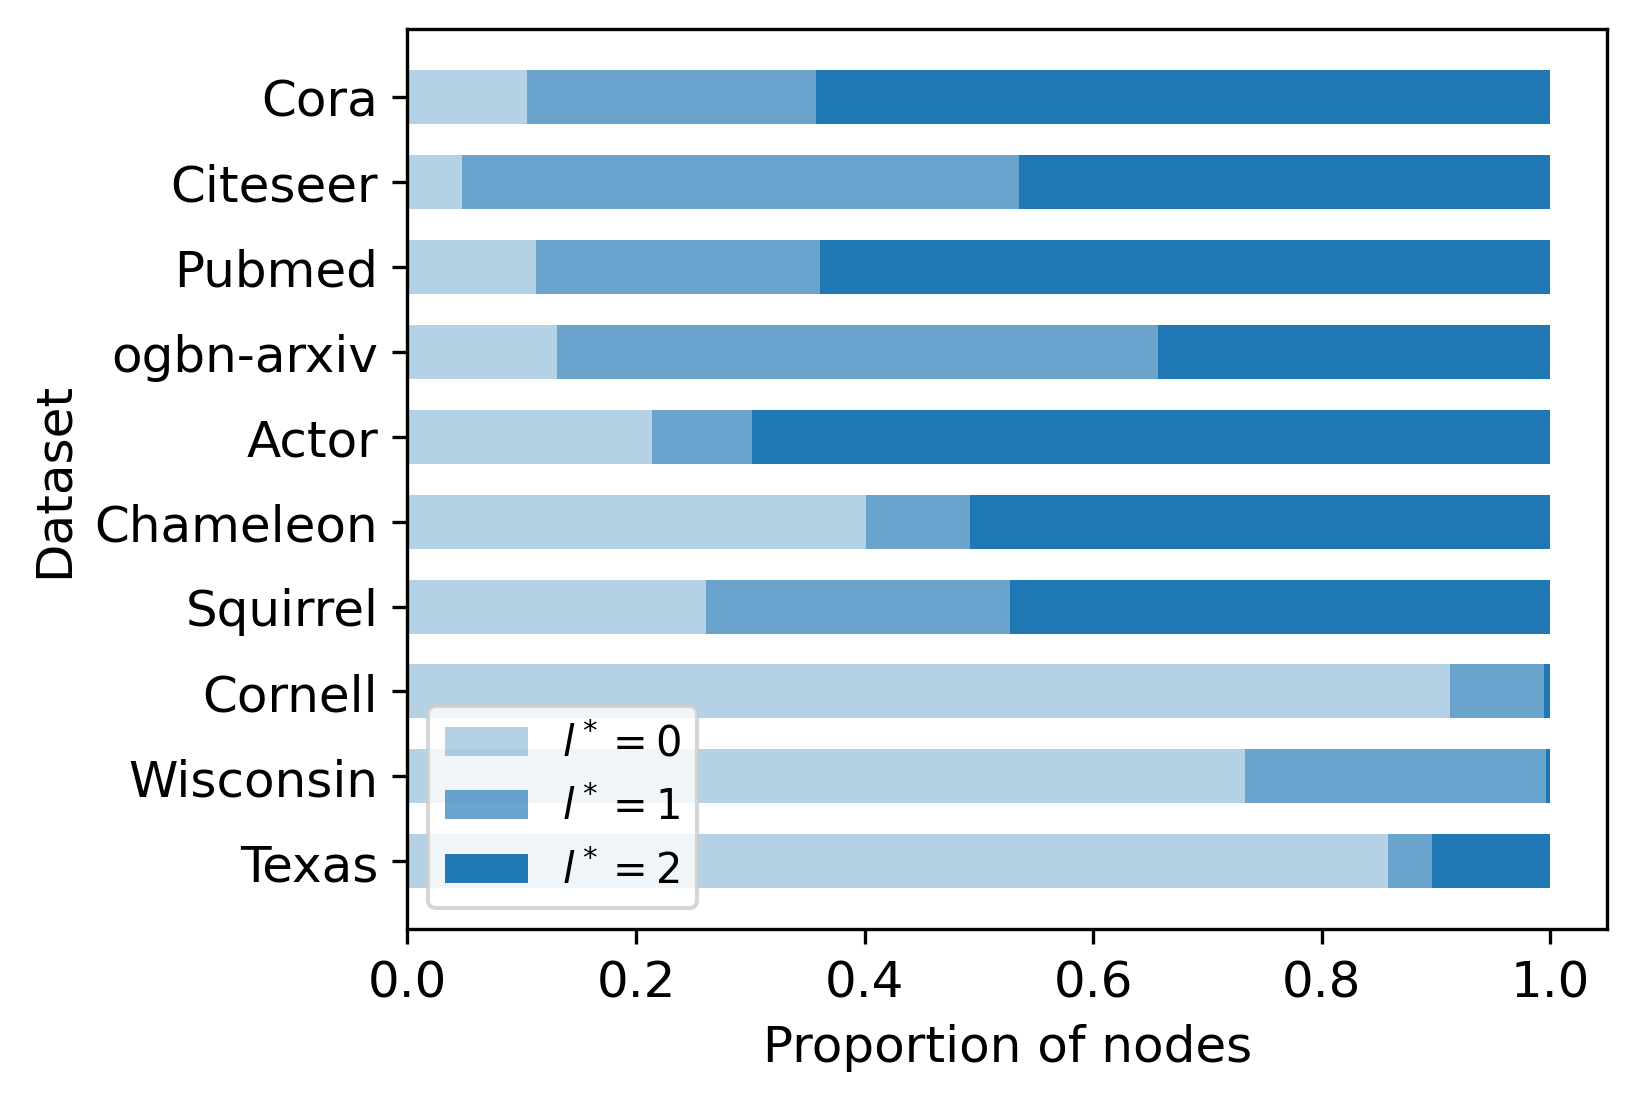

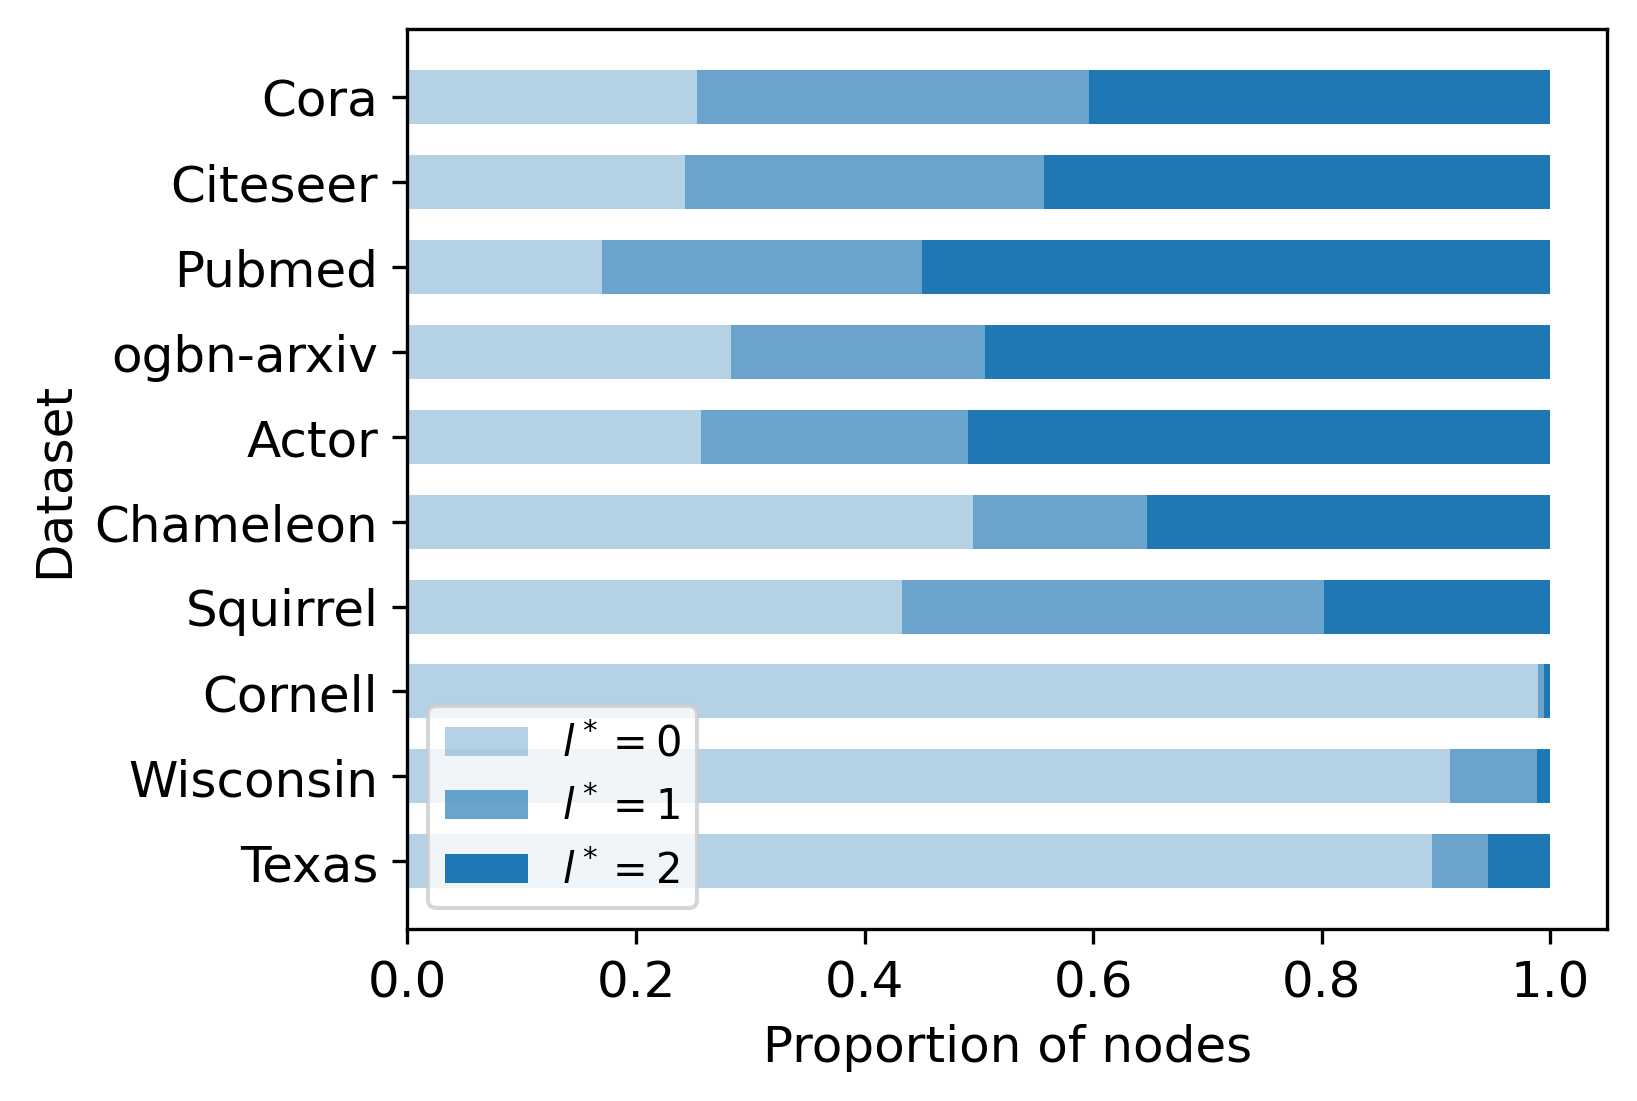

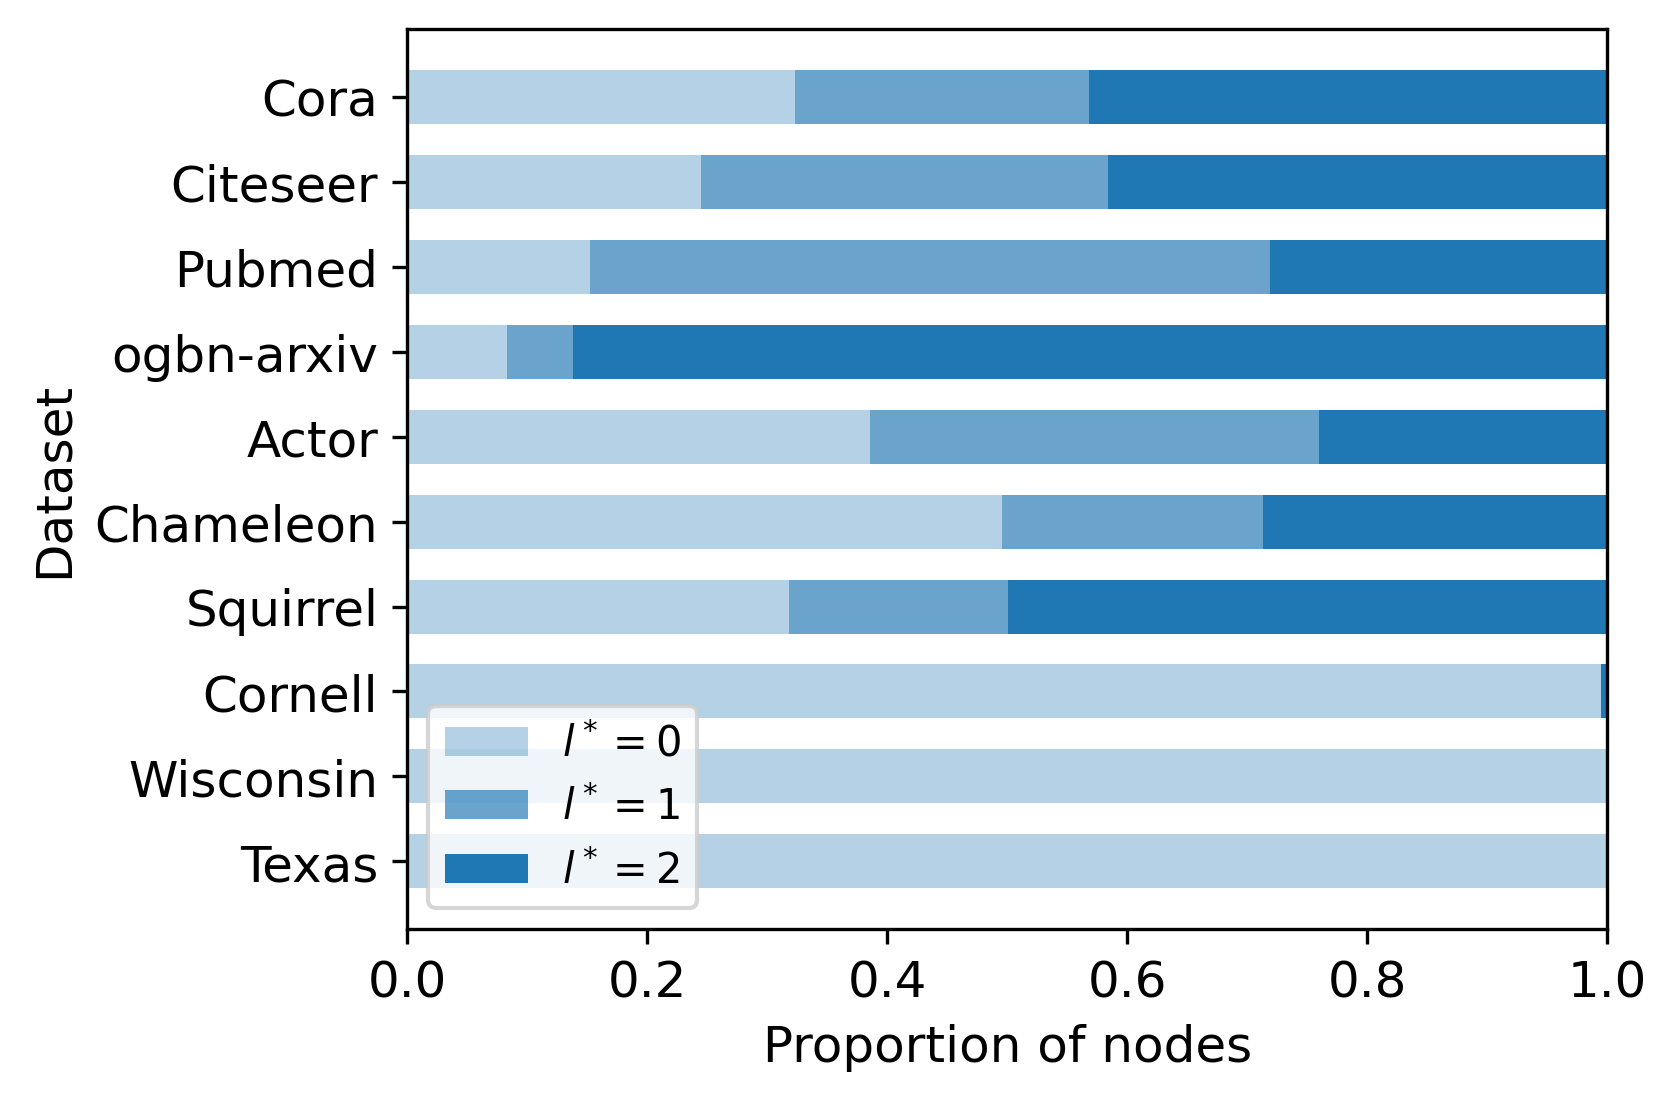

In [19]:
for model in models:
        df_m = dfs.loc[(dfs['model_name'] == model) & (dfs['scope_selection'] == 'metselect-min')]
        dloc = {'Cora': 0, 'Citeseer': 1, 'Pubmed': 2, 'Actor': 3, 'Chameleon': 4, 'Squirrel': 5, 
                'Cornell': 6, 'Wisconsin': 7, 'Texas': 8, 'ogbn-arxiv': 2.5}

        for x, y in dloc.items(): dloc[x] = 8 - y

        df_d = df_m.sort_values(by='dataset_name', key=lambda col: [dloc[x] for x in col]).reset_index()

        ind = np.arange(len(df_d["dataset_name"].unique()))*1.1
        width = 0.7

        # fig = plt.figure(figsize=(4.0, 3.0), dpi=120)
        fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        left = [0 for _ in range(len(df_d))]
        for i in range(2+1):
                label = r"$l^*=$" + f"{i}"
                propi = []
                for x in df_d['layer_props']:
                        x = ast.literal_eval(x)
                        propi.append(x[i]/sum(x.values()) if i in x else 0)
                ax.barh(ind, propi, width, left=left, color='C0', label=label, alpha=(i+1)/(2+1))
                left = [l+p for l, p in zip(left, propi)] #df_d[f'L{i}']
        plt.legend(loc='lower left')
        # plt.xlabel('Dataset',fontsize=12)
        # plt.ylabel(f'{split} ACC', fontsize=12)
        plt.xlabel('Proportion of nodes', fontsize=12)
        plt.ylabel('Dataset', fontsize=12)
        plt.yticks(ind, df_d["dataset_name"].unique()) #, rotation=45)
        #     plt.xticks(ind+width/2, df_d["dataset_name"].unique()) #, rotation=45)
        # fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        fig.savefig(f'Plots_tmlr/layers_{model}_2.pdf', bbox_inches = 'tight', pad_inches = 0.01)

# Depth

In [68]:
# df = pd.read_csv("results/results_epoch.csv")
df = pd.read_csv("results/results_deep_long.csv")
df = df.loc[df['num_epochs'] == 500]

In [69]:
model_sels = ['dataset_name', 'model_name', 'num_layers', 'scope_selection']

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [70]:
dfg = df.groupby(model_sels)

dfg_sp = dfg.mean(numeric_only=True)
dfg_sp = dfg_sp.reset_index()
dfg_sp2 = dfg.std(numeric_only=True)

# dfg_sp['Test Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test Loss'], dfg_sp2['Test Loss'])]
dfg_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test ACC'], dfg_sp2['Test ACC'])]
dfg_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test f1wtd'], dfg_sp2['Test f1wtd'])]
dfg_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test f1mac'], dfg_sp2['Test f1mac'])]
# dfg_sp['Val Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val Loss'], dfg_sp2['Val Loss'])]
dfg_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val ACC'], dfg_sp2['Val ACC'])]
dfg_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val f1wtd'], dfg_sp2['Val f1wtd'])]
dfg_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val f1mac'], dfg_sp2['Val f1mac'])]
# dfg_sp['Train Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train Loss'], dfg_sp2['Train Loss'])]
dfg_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train ACC'], dfg_sp2['Train ACC'])]
dfg_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train f1wtd'], dfg_sp2['Train f1wtd'])]
dfg_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train f1mac'], dfg_sp2['Train f1mac'])]
dfs = dfg_sp

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
methods = ['metselect-min', 'final']
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GCN+MetSelect", "GCN"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [73]:
out_cols = ['Train ACC', 'Val ACC', 'Test ACC']
# out_cols = ['Train f1wtd', 'Train f1mac', 'Val f1wtd', 'Val f1mac', 'Test f1wtd', 'Test f1mac']

In [102]:
def quality_plot (df_dm, dataset, model='gcn'):
    for output in out_cols:
        print (dataset, output)
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        for method, col, shape, label in zip(methods, colors, shapes, labels):
            df_dmm = df_dm.loc[(df_dm["scope_selection"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_dmm[output]]
            std_score = [float(x.split(',')[1]) if 'nan' not in x else 0 for x in df_dmm[output]]
            plt.errorbar(df_dmm['num_layers'], mean_score, yerr=std_score, 
                        fmt=shape, color=col, linewidth=1, markersize=6, label=label)
        ax = plt.gca()
        # ax.set_xticks(epsilon_xticks)
        # plt.legend()
        handles, leglabels = ax.get_legend_handles_labels()
        # plt.legend(handles, leglabels, loc='best', ncol=1, fontsize=10, frameon=True)
        plt.xlabel('Depth',fontsize=12)
        plt.ylabel(output, fontsize=12)
        fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots_tmlr/Depth/{output}')
        except:
            pass
        fig.savefig(f'Plots_tmlr/Depth/{output}/results_{dataset}_{model}.pdf', bbox_inches = 'tight', pad_inches = 0.01)
    return handles


Citeseer Train ACC
Citeseer Val ACC
Citeseer Test ACC
Cora Train ACC
Cora Val ACC
Cora Test ACC
Pubmed Train ACC
Pubmed Val ACC
Pubmed Test ACC
ogbn-arxiv Train ACC
ogbn-arxiv Val ACC
ogbn-arxiv Test ACC


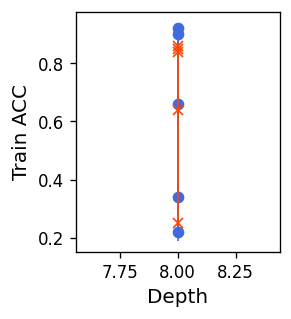

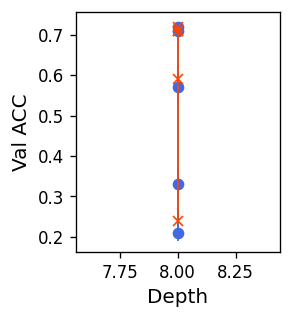

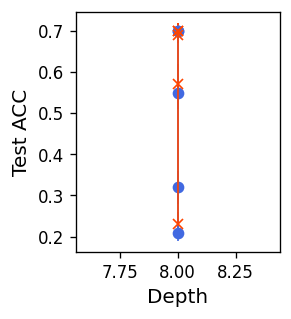

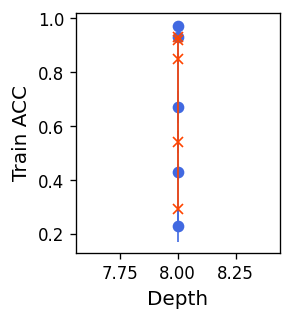

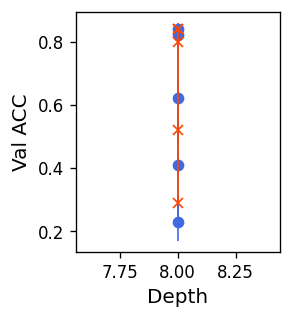

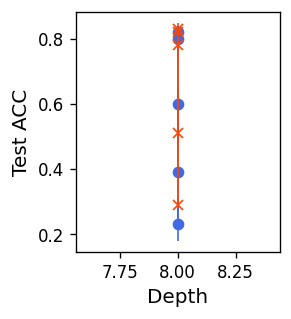

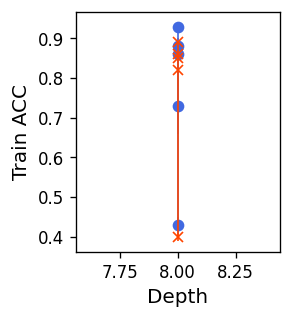

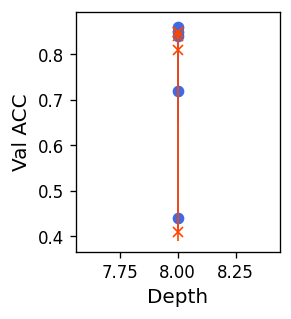

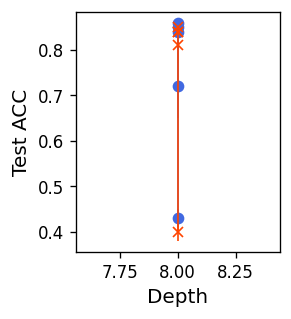

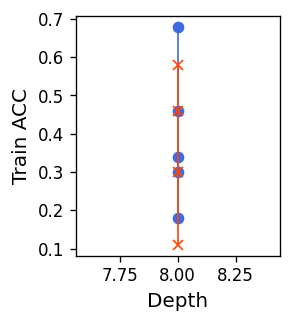

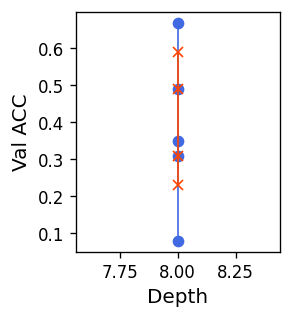

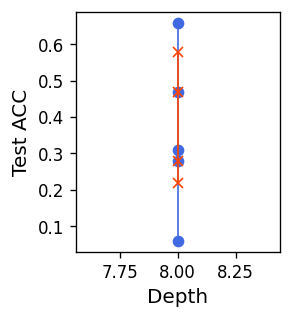

In [103]:
dfs_g = dfs.groupby(['dataset_name', 'model_name'])
for dataset, model in dfs_g.groups.keys():
    df_dm = dfs_g.get_group((dataset, model))
    handles = quality_plot(df_dm, dataset, model=model)

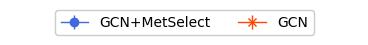

In [105]:
figsize = (1.5*3, 0.2)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(handles, labels, ncol=4, loc='center', framealpha=1.0)
# hide the axes frame and the x/y labels
ax_leg.axis('off')
fig_leg.patch.set_facecolor('white')
ax_leg.set_facecolor('white')
plt.rcParams["mathtext.fontset"] = "cm"
fig_leg.savefig('Plots_tmlr/legend.pdf', bbox_inches = 'tight', pad_inches = 0.01)

# Nepochs

In [94]:
# df = pd.read_csv("results/results_epoch.csv")
df = pd.read_csv("results/results_deep_long.csv")
df = df.loc[df['num_layers'] == 8]

In [95]:
model_sels = ['dataset_name', 'model_name', 'num_epochs', 'scope_selection']

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [96]:
dfg = df.groupby(model_sels)

dfg_sp = dfg.mean(numeric_only=True)
dfg_sp = dfg_sp.reset_index()
dfg_sp2 = dfg.std(numeric_only=True)

# dfg_sp['Test Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test Loss'], dfg_sp2['Test Loss'])]
dfg_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test ACC'], dfg_sp2['Test ACC'])]
dfg_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test f1wtd'], dfg_sp2['Test f1wtd'])]
dfg_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Test f1mac'], dfg_sp2['Test f1mac'])]
# dfg_sp['Val Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val Loss'], dfg_sp2['Val Loss'])]
dfg_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val ACC'], dfg_sp2['Val ACC'])]
dfg_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val f1wtd'], dfg_sp2['Val f1wtd'])]
dfg_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Val f1mac'], dfg_sp2['Val f1mac'])]
# dfg_sp['Train Loss'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train Loss'], dfg_sp2['Train Loss'])]
dfg_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train ACC'], dfg_sp2['Train ACC'])]
dfg_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train f1wtd'], dfg_sp2['Train f1wtd'])]
dfg_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(dfg_sp['Train f1mac'], dfg_sp2['Train f1mac'])]
dfs = dfg_sp

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
methods = ['metselect-min', 'final']
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GCN+MetSelect", "GCN"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [99]:
out_cols = ['Train ACC', 'Val ACC', 'Test ACC']
# out_cols = ['Train f1wtd', 'Train f1mac', 'Val f1wtd', 'Val f1mac', 'Test f1wtd', 'Test f1mac']

In [100]:
def quality_plot (df_dm, dataset, model='gcn'):
    for output in out_cols:
        print (dataset, output)
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        for method, col, shape, label in zip(methods, colors, shapes, labels):
            df_dmm = df_dm.loc[(df_dm["scope_selection"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_dmm[output]]
            std_score = [float(x.split(',')[1]) if 'nan' not in x else 0 for x in df_dmm[output]]
            plt.errorbar(df_dmm['num_epochs'], mean_score, yerr=std_score, 
                        fmt=shape, color=col, linewidth=1, markersize=6, label=label)
        ax = plt.gca()
        # ax.set_xticks(epsilon_xticks)
        # plt.legend()
        handles, leglabels = ax.get_legend_handles_labels()
        # plt.legend(handles, leglabels, loc='best', ncol=1, fontsize=10, frameon=True)
        plt.xlabel('Number Of Epochs',fontsize=12)
        plt.ylabel(output, fontsize=12)
        fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots_tmlr/Nepochs/{output}')
        except:
            pass
        fig.savefig(f'Plots_tmlr/Nepochs/{output}/results_{dataset}_{model}.pdf', bbox_inches = 'tight', pad_inches = 0.01)
    return handles


Citeseer Train ACC
Citeseer Val ACC
Citeseer Test ACC
Cora Train ACC
Cora Val ACC
Cora Test ACC
Pubmed Train ACC
Pubmed Val ACC
Pubmed Test ACC
ogbn-arxiv Train ACC
ogbn-arxiv Val ACC
ogbn-arxiv Test ACC


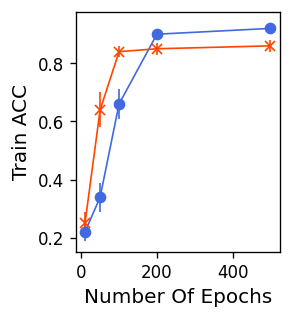

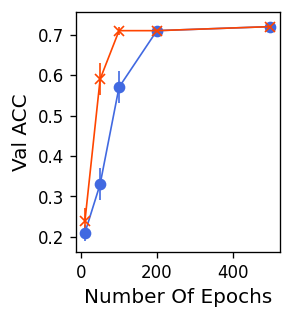

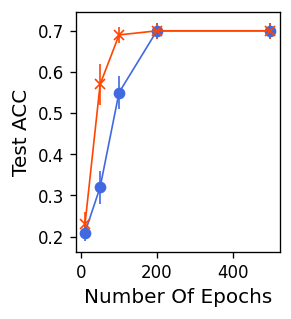

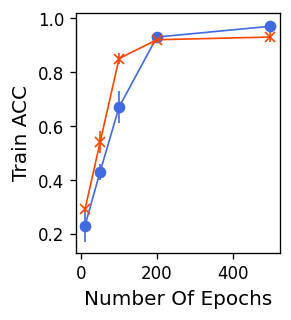

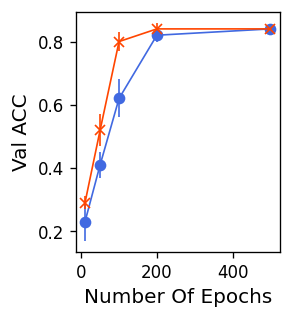

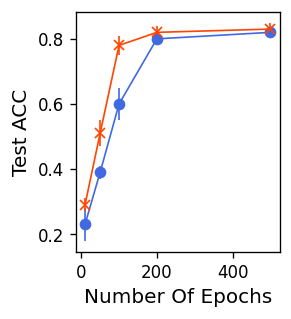

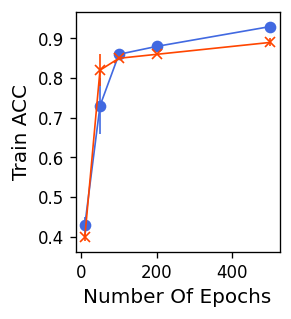

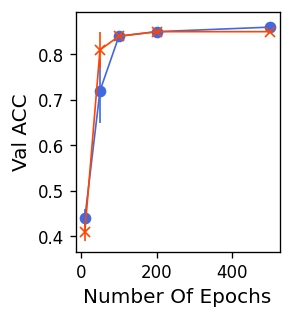

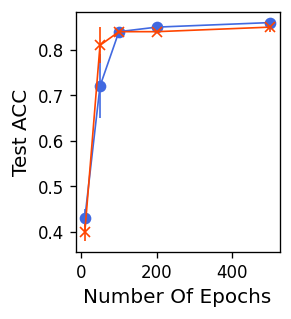

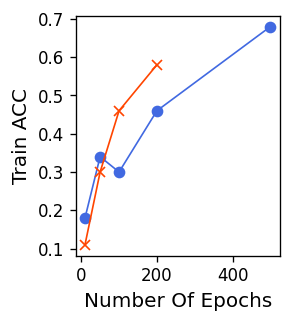

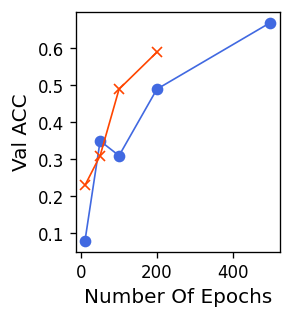

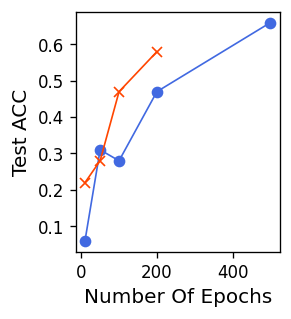

In [101]:
dfs_g = dfs.groupby(['dataset_name', 'model_name'])
for dataset, model in dfs_g.groups.keys():
    df_dm = dfs_g.get_group((dataset, model))
    quality_plot(df_dm, dataset, model=model)

# Training time

In [ ]:
df_orig = pd.read_csv("results/results_11_10.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
df_orig = pd.read_csv("results/results_01_01.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
df_orig = pd.read_csv("results/results_11_24.csv")
columns = ['dataset_name', 'model_name', 'base_model_params', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
df = df.fillna(False)
df = df.loc[~df['only_closest_layer']]

In [ ]:
model_sels = ['dataset_name', 'model_name', 'num_epochs', 'to_magnet', 'only_closest_layer']
dfg = df.groupby(model_sels)

dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr']) 
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Val ACC'] == df_g_sp['Val ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels +
                            ['lr', 'Time', 'Train ACC', 'Train f1mac', 'Train f1wtd', 
                                'Val ACC', 'Val f1wtd', 'Val f1mac', 
                                'Test ACC', 'Test f1wtd', 'Test f1mac']
                            ])
    # print (df_g_sp.loc[df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max(), 
    #                     model_sels +
    #                     ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
    #                 ].to_string())
    # print ()

In [ ]:
dfs = pd.concat(dfs, ignore_index=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GCN+MetSelect", "GCN"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
out_cols = ['Val ACC', 'Test ACC']

In [ ]:
def quality_plot (df_dm, dataset, model):
    for output in out_cols:
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        for method, col, shape, label in zip(methods, colors, shapes, labels):
            df_dmm = df_dm.loc[(df_dm["to_magnet"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_dmm[output]]
            std_score = [float(x.split(',')[1]) for x in df_dmm[output]]
            plt.errorbar(df_dmm['num_epochs'], mean_score, yerr=std_score, 
                        fmt=shape, color=col, linewidth=1, markersize=6, label=label)
        ax = plt.gca()
        # ax.set_xticks(epsilon_xticks)
        # plt.legend()
        handles,leglabels = ax.get_legend_handles_labels()
        # plt.legend(handles, leglabels, loc='best', ncol=1, fontsize=10, frameon=True)
        plt.xlabel('Number Of Epochs',fontsize=12)
        plt.ylabel(output, fontsize=12)
        fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots/Nepochs/{output}')
        except:
            pass
        fig.savefig(f'Plots/Nepochs/{output}/results_{dataset}_{model}.pdf', bbox_inches = 'tight', pad_inches = 0.01)
        return handles


In [ ]:
dfs_g = dfs.groupby(['dataset_name'])
for dataset in dfs_g.groups.keys():
    df_dm = dfs_g.get_group(dataset)
    df_dm = df_dm.loc[(df_dm['model_name'] == 'gcn') & (df_dm['num_epochs'] <= 50)]
    quality_plot(df_dm, dataset, model='gcn')

# Robustness

In [ ]:
df = pd.read_csv("results/results_poison.csv")

In [ ]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
model_sels = ['dataset_name', 'model_name', 'to_magnet', 'link_p']
dfg = df.groupby(model_sels)

dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr']) 
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels +
                            ['lr', 'Time', 'Train ACC', 'Train f1mac', 'Train f1wtd', 
                                'Val ACC', 'Val f1wtd', 'Val f1mac', 
                                'Test ACC', 'Test f1wtd', 'Test f1mac']
                            ])

In [ ]:
dfs = pd.concat(dfs)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
model = 'gcn'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GCN+MetSelect", "GCN"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
model = 'sage'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["SAGE+MetSelect", "SAGE"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
model = 'gat'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GAT+MetSelect", "GAT"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
out_cols = ['Train ACC', 'Val ACC', 'Test ACC']

In [ ]:
def quality_plot (df_dm, dataset, model='gcn'):
    for output in out_cols:
        print (dataset, output)
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        for method, col, shape, label in zip(methods, colors, shapes, labels):
            df_dmm = df_dm.loc[(df_dm["to_magnet"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_dmm[output]]
            std_score = [float(x.split(',')[1]) if 'nan' not in x else 0 for x in df_dmm[output]]
            plt.errorbar(df_dmm['link_p']*100, mean_score, yerr=std_score, 
                        fmt=shape, color=col, linewidth=1, markersize=6, label=label)
        ax = plt.gca()
        # ax.set_xticks(epsilon_xticks)
        # plt.legend()
        handles,leglabels = ax.get_legend_handles_labels()
        # plt.legend(handles, leglabels, loc='best', ncol=1, fontsize=10, frameon=True)
        plt.xlabel('Mettack Link (%)',fontsize=12)
        plt.ylabel(output, fontsize=12)
        fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots/Robustness_mettack/{output}')
        except:
            pass
        fig.savefig(f'Plots/Robustness_mettack/{output}/results_{dataset}_{model}.pdf', bbox_inches = 'tight', pad_inches = 0.01)
    return handles


In [ ]:
dfs_g = dfs.groupby(['dataset_name'])
for dataset in dfs_g.groups.keys():
    df_dm = dfs_g.get_group(dataset)
    df_dm = df_dm.loc[df_dm['model_name'] == model]
    quality_plot(df_dm, dataset, model)

In [ ]:
df = pd.read_csv("results/robust_results.csv")

In [ ]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
df = df.fillna(False)
df = df.loc[~df['only_closest_layer']]

In [ ]:
model_sels = ['dataset_name', 'model_name', 'method', 'link_p', 'feat_p']
dfg = df.groupby(model_sels)

dfs = []

df_g_sp = dfg.mean(numeric_only=True)
df_g_sp2 = dfg.std(numeric_only=True)
df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
# for x, y in model_sels: df_g_sp[x] = y
dfs = df_g_sp.reset_index()[model_sels + ['Test ACC', 'Test f1wtd', 'Test f1mac']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
methods = ["Original", "Minimum", "Reset"]
colors = ["royalblue", "orangered", "hotpink"]#, "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x', '->']# , '-+']#,  #, 's']
labels = ["GCN+ALS", "GCN+ALS+min", "GCN+ALS+reset"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
out_cols = ['Test ACC', 'Test f1wtd', 'Test f1mac']

In [ ]:
import numpy as np

def quality_plot (df_dm, dataset, model, method):
    for output in out_cols:
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)

        feat_ps = [0.00, 0.25, 0.50, 0.75, 1.0]
        link_ps = [0.00, 0.25, 0.50, 0.75, 1.0]
        df_dm[f'Mean {output}'] = [float(x.split(',')[0]) for x in df_dm[output]]
        sns.heatmap(df_dm.pivot(index='feat_p', columns='link_p', values=f'Mean {output}'))
        plt.xlabel('Missing link percentage',fontsize=10)
        plt.ylabel('Missing feature percentage', fontsize=10)
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                            hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots/Robustness/{output}')
        except:
            pass
        plt.savefig(f'Plots/Robustness/{output}/results_{dataset}_{model}_{method}.pdf', bbox_inches = 'tight', pad_inches = 0.01)


In [ ]:
dfg = dfs.loc[dfs['method'] == 'Baseline'].groupby(['dataset_name', 'model_name'])
for dataset, model in dfg.groups.keys():
    df_dm = dfg.get_group((dataset, model))
    quality_plot(df_dm, dataset, model, 'Baseline')

In [ ]:
dfs_g = dfs.groupby(['dataset_name', 'model_name', 'method'])
for dataset, model, method in dfs_g.groups.keys():
    df_dm = dfs_g.get_group((dataset, model, method))
    quality_plot(df_dm, dataset, model, method)

# Interpretibility

In [ ]:
df = pd.read_csv("results/interp_results.csv")

In [ ]:
df = pd.read_csv("results/interp_results_new.csv")

In [ ]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
model_sels = ['dataset_name', 'model_name', 'method']
dfg = df.groupby(model_sels)

dfs = []

df_g_sp = dfg.mean(numeric_only=True)
df_g_sp2 = dfg.std(numeric_only=True)
df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
# for x, y in model_sels: df_g_sp[x] = y
dfs = df_g_sp.reset_index()[model_sels + ['Test ACC', 'Test f1wtd', 'Test f1mac', 'Train ACC', 'Train f1wtd', 'Train f1mac', 'Val ACC', 'Val f1wtd', 'Val f1mac']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

min_only = np.array(df.loc[df['method'] == 'Min_only']['Test ACC']) 
orig = np.array(df.loc[df['method'] == 'Original']['Test ACC'])
minus_min = np.array(df.loc[df['method'] == 'Minus_min']['Test ACC'])

In [ ]:
from scipy.stats import ttest_ind

ttest_ind (min_only, minus_min)

In [ ]:
methods = ["Min_only", "Minus_min"]
colors = ["dimgray", "lightgray"] #, "hotpink"] #, "dimgray"]#, "orangered"] #, ]
# labels = ["only Expl. layer", "w/o Expl. layer"] #r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']
labels = ["only " + r"$\ell^*$", "without " + r"$\ell^*$"] #r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
out_cols = ['Test ACC', 'Test f1wtd', 'Test f1mac']
# out_cols = ['Train ACC', 'Train f1wtd', 'Train f1mac']

In [ ]:
import numpy as np

dloc = {'Cora': 0, 'Citeseer': 1, 'Pubmed': 2, 'Actor': 3, 'Chameleon': 4, 'Squirrel': 5, 
        'Cornell': 6, 'Wisconsin': 7, 'Texas': 8, 'ogbn-arxiv': 2.5}

for x, y in dloc.items(): dloc[x] = 8 - y

dfs = dfs.sort_values(by='dataset_name', key=lambda col: [dloc[x] for x in col]).reset_index()

ind = np.arange(len(dfs["dataset_name"].unique()))*1.2
width = 0.4
for model in dfs['model_name'].unique():
    df_mod = dfs.loc[dfs['model_name'] == model]
    for output in out_cols:
        fig = plt.figure(figsize=(4.0, 3.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        df_m = df_mod.loc[(df_mod["method"] == "Original")]
        mean_score = [float(x.split(',')[0]) for x in df_m[output]]
        plt.vlines(x=mean_score, ymin=ind-width, ymax=ind+width*len(methods), color='k', linestyles=':', lw=2, label='Original')
        for i, (method, col, label) in enumerate(zip(methods[::-1], colors[::-1], labels[::-1])):
            df_m = df_mod.loc[(df_mod["method"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_m[output]]
            std_score = [float(x.split(',')[1]) for x in df_m[output]]
            plt.barh(ind+width*i, mean_score, width, color=col, label=label)
            plt.errorbar(mean_score, ind+width*i, xerr=std_score, fmt='.', color='k', linewidth=1, markersize=6)
        plt.legend(loc='upper left')
        plt.ylabel('Dataset',fontsize=12)
        plt.xlabel(output, fontsize=12)
        plt.yticks(ind+width/2, df_mod["dataset_name"].unique())
        # fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        fig.savefig(f'Plots/Interpretibility/{model}_{output}_h.pdf', 
                    bbox_inches = 'tight', pad_inches = 0.01)


In [ ]:
import numpy as np

dloc = {'Cora': 0, 'Citeseer': 1, 'Pubmed': 2, 'Actor': 3, 'Chameleon': 4, 'Squirrel': 5, 
        'Cornell': 6, 'Wisconsin': 7, 'Texas': 8, 'ogbn-arxiv': 2.5}

for x, y in dloc.items(): dloc[x] = 8 - y

dfs = dfs.sort_values(by='dataset_name', key=lambda col: [dloc[x] for x in col]).reset_index()

ind = np.arange(len(dfs["dataset_name"].unique()))*1.2
width = 0.4

for model in dfs['model_name'].unique():
    df_mod = dfs.loc[dfs['model_name'] == model]
    for output in out_cols:
        fig = plt.figure(figsize=(4.0, 3.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        df_m = df_mod.loc[(df_mod["method"] == "Original")]
        mean_score = [float(x.split(',')[0]) for x in df_m[output]]
        plt.hlines(y=mean_score, xmin=ind-width, xmax=ind+width*len(methods), color='purple', linestyles=':', lw=2, label='Original')
        for i, (method, col, label) in enumerate(zip(methods, colors, labels)):
            df_m = df_mod.loc[(df_mod["method"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_m[output]]
            std_score = [float(x.split(',')[1]) for x in df_m[output]]
            plt.bar(ind+width*i, mean_score, width, color=col, label=label)
            plt.errorbar(ind+width*i, mean_score, yerr=std_score, 
                        fmt='.', color='k', linewidth=1, markersize=6)
        plt.legend()
        plt.xlabel('Dataset',fontsize=12)
        plt.ylabel(output, fontsize=12)
        plt.xticks(ind+width/2, df_mod["dataset_name"].unique(), rotation=45)
        # fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        fig.savefig(f'Plots/Interpretibility/{model}_{output}.pdf', 
                    bbox_inches = 'tight', pad_inches = 0.01)


In [ ]:
dfs_g = dfs.groupby(['dataset_name'])
for dataset in dfs_g.groups.keys():
    df_dm = dfs_g.get_group(dataset)
    quality_plot(df_dm, dataset, model='gcn')

In [ ]:
dfs.loc[dfs['method'] == 'Original']

In [ ]:
dfs.loc[dfs['method'] == 'Min_only']

In [ ]:
dfs.loc[dfs['method'] == 'Minus_min']

# Draw Interpretability

In [ ]:
import torch
import numpy as np
import yaml
from easydict import EasyDict as edict
from utils.dataset import Dataset
from utils.evaluator import Evaluate
import time
import argparse
import sys
import pickle as pkl
import csv
import os
import networkx as nx

In [ ]:
task = 'node_classification'
dataset_name = 'Texas'
model_name = 'gcn'
save_dir = 'best_0'
seed = 42
device = 'cpu'

In [ ]:
saved_model_dir = f'saved_models/{task}/{dataset_name}/{model_name}/{save_dir}'

model_config = edict(yaml.load(open(f'{saved_model_dir}/model_config.yaml', 'r'), Loader=yaml.FullLoader))
train_config = edict(yaml.load(open(f'{saved_model_dir}/train_config.yaml', 'r'), Loader=yaml.FullLoader))
    
if model_config.base_model_params is not None and type(model_config) is list and len(model_config.base_model_params) > model_config.num_layers:
    model_config.num_layers = len(model_config.base_model_params)
    model_config.hidden_dims = [model_config.hidden_dims[0]] * model_config.num_layers
else:
    model_config.base_model_params = [{}] * model_config.num_layers

np.random.seed(seed)
torch.manual_seed(seed)
        
dataset = Dataset (root='data/', name=train_config.dataset_name, task=train_config.task, 
                    split=train_config.split, nsplit=train_config.nsplit, device=device)
data = dataset.data

from models.metselect import Magnet
from utils.magnet_trainer import Trainer
model = Magnet (task=train_config.task, num_nodes=data.num_nodes, num_features=dataset.num_features, 
                num_classes=dataset.num_classes, device=device, class_weights=None, 
                **model_config).to(device)
trainer = Trainer(to_magnet=model.to_magnet, model_parameters=model.parameters(), dataset=dataset, 
                train_config=train_config, model_config=model_config, class_weights=None,
                device=device)

model.load_state_dict(torch.load(f'{saved_model_dir}/state_dict.pt', map_location=device))
if os.path.exists(f'{saved_model_dir}/protos.pt'):
    model.protos = torch.load(f'{saved_model_dir}/protos.pt').to(device)
    trainer_params = pkl.load(open(f'{saved_model_dir}/trainer_params.pkl', 'rb'))
    trainer.variance = trainer_params['variance'].to(device)
    trainer.n_vars = trainer_params['n_vars']

In [ ]:
evaluators = []
for metric in train_config.metrics:
    evaluators.append(Evaluate (dataset=dataset, task=train_config.task, metric_name=metric))

In [ ]:
model.eval()
# y_hat, _, _, _ = trainer.test_data(model, data, big_data=data.num_nodes>100000)
min_dists, min_layers, y_hat = trainer.test_data_closest(model, data, big_data=data.num_nodes>100000)
# y_hat = trainer.test_data_counterf_min(model, data, big_data=data.num_nodes>100000)

In [ ]:
import networkx as nx
import torch_geometric.utils as tg_utils
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra

In [ ]:
colors = np.array(['red', 'green', 'yellow', 'blue', 'orange', 'gray', 'pink'])

In [ ]:
np.where(min_layers != 0)

In [ ]:
min_layers[3]

In [ ]:
G = tg_utils.to_networkx(data, to_undirected=True, remove_self_loops=True)

In [ ]:
n = 182
l = min_layers[n]
G0 = nx.ego_graph(G, n, radius=l, distance='weight', undirected=True)

In [ ]:
nx.draw(G0, pos=graphviz_layout(G0, prog='twopi', root=n, args=''), 
        with_labels=True, node_color=[colors[data.y[n]] for n in G0.nodes()], arrows=False) 

In [ ]:
min_layers[19]

In [ ]:
n = 2
l = min_layers[n]
G0 = nx.ego_graph(G, n, radius=l, distance='weight', undirected=True)

In [ ]:
nx.draw(G0, pos=graphviz_layout(G0, prog='twopi', root=n, args=''), 
        with_labels=True, node_color=[colors[data.y[n]] for n in G0.nodes()], arrows=False) 

In [ ]:
min_layers == 0

# Layer Proportion

In [ ]:
df = pd.read_csv("results/layer_results.csv")

In [ ]:
df['Train L0'] = [int(x.split("|")[0]) for x in df['Train']]
df['Train L1'] = [int(x.split("|")[1]) for x in df['Train']]
df['Train L2'] = [int(x.split("|")[2]) for x in df['Train']]

df['Val L0'] = [int(x.split("|")[0]) for x in df['Val']]
df['Val L1'] = [int(x.split("|")[1]) for x in df['Val']]
df['Val L2'] = [int(x.split("|")[2]) for x in df['Val']]

df['Test L0'] = [int(x.split("|")[0]) for x in df['Test']]
df['Test L1'] = [int(x.split("|")[1]) for x in df['Test']]
df['Test L2'] = [int(x.split("|")[2]) for x in df['Test']]

In [ ]:
model = 'sage'
df = df.loc[df['model_name'] == model]

In [ ]:
df_d = df.groupby('dataset_name').sum(numeric_only=True).reset_index()

for s in ['Train', 'Val', 'Test']:
    df_d[f'{s} sum'] = 0
    for i in range(3):
        df_d[f'{s} sum'] += df_d[f'{s} L{i}']

for i in range(3):
    for s in ['Train', 'Val', 'Test']:
        df_d[f'{s} L{i}'] = df_d[f'{s} L{i}']/df_d[f'{s} sum']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
layers = [0, 1, 2]
colors = ["hotpink", "dimgray", 'goldenrod'] #, "hotpink"] #, "dimgray"]#, "orangered"] #, ]
labels = [r"$l^*=0$", r"$l^*=1$", r"$l^*=2$"] #r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
dloc = {'Cora': 0, 'Citeseer': 1, 'Pubmed': 2, 'Actor': 3, 'Chameleon': 4, 'Squirrel': 5, 
        'Cornell': 6, 'Wisconsin': 7, 'Texas': 8, 'ogbn-arxiv': 2.5}

for x, y in dloc.items(): dloc[x] = 8 - y

df_d = df_d.sort_values(by='dataset_name', key=lambda col: [dloc[x] for x in col]).reset_index()

ind = np.arange(len(df_d["dataset_name"].unique()))*1.1
width = 0.7

for split in ['Train', 'Val', 'Test']:
    # fig = plt.figure(figsize=(4.0, 3.0), dpi=120)
    fig, ax = plt.subplots(1, 1, figsize=(9, 5), dpi=120)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    left = 0
    for i, (layer, label) in enumerate(zip(layers, labels)):
        ax.barh(ind, df_d[f'{split} L{i}'], width, left=left, color='C0', label=label, alpha=0.3*(i+1))
        left += df_d[f'{split} L{i}']
        # plt.barh(ind+width*i, df_d[f'{split} L{i}'], width, bottom=bottom, color='C0', label=label, alpha=0.1 + 0.25 * i)
    plt.legend(loc='lower left')
    # plt.xlabel('Dataset',fontsize=12)
    # plt.ylabel(f'{split} ACC', fontsize=12)
    plt.xlabel('Proportion of nodes',fontsize=12)
    plt.ylabel('Dataset', fontsize=12)
    plt.yticks(ind, df_d["dataset_name"].unique()) #, rotation=45)
#     plt.xticks(ind+width/2, df_d["dataset_name"].unique()) #, rotation=45)
    # fig.tight_layout()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    fig.savefig(f'Plots/Layers/{model}_{split}.pdf', 
                    bbox_inches = 'tight', pad_inches = 0.01)

# Depth comparison

In [5]:
import pandas as pd

In [6]:
# fnames = ['results_new_gated_gcn_again', 'results_deep_again', 'results_jknet']

In [7]:
dfs = []

for fname in fnames:
  df_orig = pd.read_csv(f"results/{fname}.csv")
  columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'scope_selection', 
            'decoding', 'num_layers', 'dist_metric', 'only_closest_layer', 'warmup', 
            'Train', 'Val', 'Test', 'Time']
  if 'layerprops' in fname:
    columns.append('layer_props')
  df = df_orig[columns]
  pd.options.mode.chained_assignment = None 

  df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
  df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
  df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

  df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
  df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
  df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

  df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
  df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
  df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]
  out_cols = ['Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
  df = df.loc[(df['decoding'] == 'linear')]
  dfs.append(df)

dfs = pd.concat(dfs, ignore_index=True)

model_sels = ['dataset_name', 'model_name', 'scope_selection', 'num_layers']
dfg = dfs.groupby(model_sels)


In [8]:
dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs', 'warmup', 'decoding'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Val ACC'] == df_g_sp['Val ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels + 
                        #    ['decoding', 'lr', 'num_epochs', 'warmup'] + out_cols])
                           ['decoding', 'num_layers', 'lr', 'num_epochs', 'warmup'] + out_cols])

dfs = pd.concat(dfs, ignore_index=True)

In [10]:
dfs.loc[dfs['model_name'] =='gcn']

,dataset_name,model_name,scope_selection,num_layers,decoding,num_layers,lr,num_epochs,warmup,Time,Test ACC,Test f1wtd,Test f1mac
32,Actor,gcn,attn-pool,2,linear,2,0.010,300,0,63.706453,"0.35,0.01","0.34,0.01","0.33,0.01"
33,Actor,gcn,attn-pool,4,linear,4,0.010,300,0,113.851225,"0.35,0.01","0.34,0.02","0.32,0.02"
34,Actor,gcn,attn-pool,8,linear,8,0.001,300,0,210.937224,"0.35,0.01","0.34,0.01","0.31,0.01"
35,Actor,gcn,attn-pool,16,linear,16,0.001,300,0,414.429036,"0.36,0.01","0.35,0.01","0.33,0.02"
36,Actor,gcn,cat-pool,2,linear,2,0.010,300,0,61.667365,"0.35,0.01","0.34,0.01","0.33,0.01"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,ogbn-arxiv,gcn,max-pool,16,linear,16,0.010,300,0,1473.858823,"0.69,nan","0.68,nan","0.45,nan"
616,ogbn-arxiv,gcn,wtd-sum,2,linear,2,0.010,300,0,285.512684,"0.69,nan","0.67,nan","0.46,nan"
617,ogbn-arxiv,gcn,wtd-sum,4,linear,4,0.010,300,0,305.542997,"0.69,nan","0.68,nan","0.46,nan"
618,ogbn-arxiv,gcn,wtd-sum,8,linear,8,0.010,300,0,553.170544,"0.70,nan","0.68,nan","0.46,nan"


In [16]:
dfs.loc[(dfs['scope_selection'] == 'attn-pool')]

,dataset_name,model_name,scope_selection,num_layers,decoding,num_layers,lr,num_epochs,warmup,Time,Test ACC,Test f1wtd,Test f1mac
0,Actor,gat,attn-pool,2,linear,2,0.010,300,0,66.808931,"0.35,0.01","0.34,0.01","0.32,0.01"
1,Actor,gat,attn-pool,4,linear,4,0.001,300,0,125.218409,"0.35,0.01","0.34,0.01","0.31,0.02"
2,Actor,gat,attn-pool,8,linear,8,0.001,300,0,238.277733,"0.36,0.01","0.34,0.01","0.32,0.02"
3,Actor,gat,attn-pool,16,linear,16,0.001,300,0,493.304267,"0.36,0.01","0.34,0.01","0.32,0.02"
32,Actor,gcn,attn-pool,2,linear,2,0.010,300,0,63.706453,"0.35,0.01","0.34,0.01","0.33,0.01"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,ogbn-arxiv,gcn,attn-pool,16,linear,16,0.010,300,0,305.542997,"0.69,nan","0.68,nan","0.46,nan"
620,ogbn-arxiv,gin,attn-pool,2,linear,2,0.010,300,0,596.875404,"0.60,nan","0.59,nan","0.35,nan"
621,ogbn-arxiv,gin,attn-pool,4,linear,4,0.010,300,0,372.321976,"0.66,nan","0.65,nan","0.41,nan"
622,ogbn-arxiv,gin,attn-pool,8,linear,8,0.010,300,0,372.321976,"0.66,nan","0.65,nan","0.41,nan"


In [13]:
dfs.loc[(dfs['model_name'] =='gated-gcn') & (dfs['scope_selection'] == 'final')]

,dataset_name,model_name,scope_selection,num_layers,decoding,num_layers,lr,num_epochs,warmup,Time,Test ACC,Test f1wtd,Test f1mac
16,Actor,gated-gcn,final,2,linear,2,0.010,300,10,16.267129,"0.34,0.01","0.31,0.02","0.28,0.02"
17,Actor,gated-gcn,final,4,linear,4,0.010,300,20,20.851243,"0.32,0.02","0.31,0.02","0.28,0.02"
80,Chameleon,gated-gcn,final,2,linear,2,0.001,300,20,12.361254,"0.70,0.03","0.70,0.03","0.70,0.03"
81,Chameleon,gated-gcn,final,4,linear,4,0.010,300,0,18.539293,"0.66,0.03","0.66,0.03","0.66,0.03"
144,Citeseer,gated-gcn,final,2,linear,2,0.010,300,30,12.276164,"0.72,0.02","0.71,0.02","0.67,0.02"
145,Citeseer,gated-gcn,final,4,linear,4,0.010,300,20,17.310575,"0.71,0.02","0.70,0.02","0.66,0.03"
208,Cora,gated-gcn,final,2,linear,2,0.010,300,30,11.962717,"0.82,0.01","0.82,0.01","0.80,0.01"
209,Cora,gated-gcn,final,4,linear,4,0.010,300,20,17.421374,"0.84,0.02","0.84,0.02","0.82,0.02"
272,Cornell,gated-gcn,final,2,linear,2,0.010,300,10,11.506924,"0.56,0.10","0.53,0.13","0.38,0.11"
273,Cornell,gated-gcn,final,4,linear,4,0.010,300,10,15.904603,"0.54,0.09","0.50,0.10","0.35,0.07"


In [9]:
order= {'Cora': 0, 'Citeseer': 1, 'Pubmed': 2, 'Actor': 3, 
        'Chameleon': 4, 'Squirrel': 5, 'Cornell': 6, 
        'Wisconsin': 7, 'Texas': 8, 'ogbn-arxiv': 9}


print(dfs.loc[
        (dfs['scope_selection'] == 'metselect-min') &
        (dfs['model_name'] == 'gcn')
              ].sort_values('dataset_name', key=lambda x: x.map(order)
        )[['dataset_name', 'decoding', 'num_layers', 'model_name', 'Test ACC']].transpose().to_string())

Empty DataFrame
Columns: []
Index: [dataset_name, decoding, num_layers, num_layers, model_name, Test ACC]


# GCN Higher layers

In [ ]:
df_orig = pd.read_csv("results/results_12_19.csv")
columns = ['dataset_name', 'model_name', 'num_layers', 'base_model_params', 'nsplit', 
           'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 
           'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
fname = 'results_new_gated_gcn_again'
fname = 'results_deep_metselect'
fname = 'results_jknet'

In [ ]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
df = df.fillna(False)
df = df.loc[~df['only_closest_layer']]

In [ ]:
model_sels = ['dataset_name', 'model_name', 'to_magnet', 'num_layers', 'only_closest_layer']
dfg = df.groupby(model_sels)

dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs']) 
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels +
                            ['lr', 'num_epochs', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
                            ])

In [ ]:
dfs = pd.concat(dfs, ignore_index=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
model = 'gcn'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GCN+MetSelect", "GCN"] #[r"$\mathsc{GIN}$", r"$\mathsc{GCN}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
model = 'sage'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["SAGE+MetSelect", "SAGE"] #[r"$\mathsc{GIN}$", r"$\mathsc{SAGE}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
model = 'gat'
methods = [True, False]
colors = ["royalblue", "orangered"] #, "hotpink", "dimgray"]#, "orangered"] #, ]
shapes = ['-o', '-x'] #, '->', '-+']#,  #, 's']
labels = ["GAT+MetSelect", "GAT"] #[r"$\mathsc{GIN}$", r"$\mathsc{SAGE}$"]#, 'Random']#, 'Degree'] #, 'RL-S2V']

In [ ]:
out_cols = ['Test ACC', 'Test f1wtd', 'Test f1mac']

In [ ]:
def quality_plot (df_dm, dataset, model):
    for output in out_cols:
        fig = plt.figure(figsize=(1.7, 2.0), dpi=120)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        for method, col, shape, label in zip(methods, colors, shapes, labels):
            df_dmm = df_dm.loc[(df_dm["to_magnet"] == method)]
            mean_score = [float(x.split(',')[0]) for x in df_dmm[output]]
            std_score = [float(x.split(',')[1]) for x in df_dmm[output]]
            plt.errorbar(df_dmm['num_layers'], mean_score, yerr=std_score, 
                        fmt=shape, color=col, linewidth=1, markersize=6, label=label)
        ax = plt.gca()
        # ax.set_xticks(epsilon_xticks)
        # plt.legend()
        handles,leglabels = ax.get_legend_handles_labels()
        # plt.legend(handles, leglabels, loc='best', ncol=1, fontsize=10, frameon=True)
        plt.xlabel('Number Of Layers (L)',fontsize=12)
        plt.ylabel(output, fontsize=12)
        fig.tight_layout()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
        try:
            os.makedirs(f'Plots/Depth/{output}')
        except:
            pass
        # fig.savefig(f'Plots/Depth/{output}/results_{dataset}_{model}.pdf', bbox_inches = 'tight', pad_inches = 0.01)
    return handles, leglabels

In [ ]:
dfs_g = dfs.groupby(['dataset_name'])
for dataset in dfs_g.groups.keys():
    df_dm = dfs_g.get_group(dataset)
    df_dm = df_dm.loc[df_dm['model_name'] == model]
    handles, labels = quality_plot(df_dm, dataset, model=model)
    break

In [ ]:
figsize = (1.5*3, 0.2)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(handles, labels, ncol=4, loc='center', framealpha=1.0)
# hide the axes frame and the x/y labels
ax_leg.axis('off')
fig_leg.patch.set_facecolor('white')
ax_leg.set_facecolor('white')
plt.rcParams["mathtext.fontset"] = "cm"
fig_leg.savefig('Plots/legend_sage.pdf', bbox_inches = 'tight', pad_inches = 0.01)

# Rebuttal

### GraphSAGE

In [4]:
df_orig = pd.read_csv("results/results_graphsage.csv")
columns = ['dataset_name', 'model_name', 'base_model_params', 'nsplit', 'lr', 'num_epochs', 'num_layers', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]
df['base_model_params'] = [[y['aggr'] for y in ast.literal_eval(x)][0] for x in df['base_model_params']]

In [5]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [8]:
model_sels = ['dataset_name', 'model_name', 'base_model_params', 'to_magnet']
dfg = df.groupby(model_sels)
df_mods = []
for g in dfg.groups:     
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    df_g_sp = df_g_sp.reset_index()
    df_mods.append(df_g_sp.loc[max_index, 
                        model_sels +
                        ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
                    ])
    # print (df_g_sp.loc[max_index, 
    #                     model_sels +
    #                     ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
    #                 ].to_string())
    # print ()
    
df_mods = pd.concat(df_mods)

In [9]:
df_mods.loc[(df_mods['model_name'] == 'sage') & (df_mods['to_magnet']), ['dataset_name', 'base_model_params', 'Test ACC']]

,dataset_name,base_model_params,Test ACC
1,Actor,add,"0.33,0.01"
1,Actor,max,"0.33,0.01"
1,Actor,min,"0.33,0.01"
0,Chameleon,add,"0.47,0.02"
0,Chameleon,max,"0.47,0.02"
0,Chameleon,min,"0.47,0.02"
1,Citeseer,add,"0.74,0.01"
1,Citeseer,max,"0.74,0.01"
1,Citeseer,min,"0.74,0.01"
0,Cora,add,"0.83,0.02"


In [10]:
df_mods.loc[(df_mods['model_name'] == 'sage') & ~(df_mods['to_magnet']), ['dataset_name', 'base_model_params', 'Test ACC']]

,dataset_name,base_model_params,Test ACC
1,Actor,add,"0.33,0.01"
1,Actor,max,"0.33,0.01"
1,Actor,min,"0.33,0.01"
1,Chameleon,add,"0.43,0.05"
1,Chameleon,max,"0.43,0.05"
1,Chameleon,min,"0.43,0.05"
1,Citeseer,add,"0.74,0.02"
1,Citeseer,max,"0.74,0.02"
1,Citeseer,min,"0.74,0.02"
1,Cora,add,"0.85,0.02"


### Layers

In [11]:
df_orig = pd.read_csv("results/results_gcn.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'num_layers', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [12]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [19]:
model_sels = ['dataset_name', 'model_name', 'to_magnet', 'num_layers', 'only_closest_layer']
dfg = df.groupby(model_sels)

dfs = []

for g in dfg.groups:
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs']) 
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    dfs.append(df_g_sp.loc[max_index, model_sels +
                            ['lr', 'num_epochs', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
                            ])

dfs = pd.concat(dfs, ignore_index=True)


In [20]:
dfs

,dataset_name,model_name,to_magnet,num_layers,only_closest_layer,lr,num_epochs,Time,Test ACC,Test f1wtd,Test f1mac
0,ogbn-arxiv,gcn,False,2,False,0.010,100,22.264144,"0.64,nan","0.61,nan","0.34,nan"
1,ogbn-arxiv,gcn,False,4,False,0.010,100,22.171859,"0.65,nan","0.62,nan","0.34,nan"
2,ogbn-arxiv,gcn,False,8,False,0.010,100,27.911537,"0.50,nan","0.43,nan","0.11,nan"
3,ogbn-arxiv,gcn,False,16,False,0.010,100,33.752623,"0.32,nan","0.20,nan","0.05,nan"
4,ogbn-arxiv,gcn,False,32,False,0.010,100,48.307288,"0.24,nan","0.12,nan","0.02,nan"
5,ogbn-arxiv,gcn,False,64,False,0.010,100,76.653994,"0.24,nan","0.14,nan","0.02,nan"
6,ogbn-arxiv,gcn,False,128,False,0.010,100,132.479633,"0.23,nan","0.10,nan","0.01,nan"
7,ogbn-arxiv,gcn,True,2,False,0.001,50,29.262156,"0.60,nan","0.60,nan","0.35,nan"
8,ogbn-arxiv,gcn,True,4,False,0.001,100,69.063179,"0.61,nan","0.62,nan","0.39,nan"
9,ogbn-arxiv,gcn,True,8,False,0.001,50,40.880958,"0.60,nan","0.61,nan","0.38,nan"


# Best node classification

In [ ]:
df_orig = pd.read_csv("results/results_11_10.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [21]:
df_orig = pd.read_csv("results/results_11_10_new.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
df_orig = pd.read_csv("results/results_01_01.csv")
columns = ['dataset_name', 'model_name', 'base_model_params', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
df_orig = pd.read_csv("results/results_11_24.csv")
columns = ['dataset_name', 'model_name', 'base_model_params', 'nsplit', 'lr', 'num_epochs', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [ ]:
df_orig = pd.read_csv("results/results_12_19.csv")
columns = ['dataset_name', 'model_name', 'nsplit', 'lr', 'num_epochs', 'num_layers', 'to_magnet', 'dist_metric', 'only_closest_layer', 'Train', 'Val', 'Test', 'Time']
df = df_orig[columns]

In [22]:
pd.options.mode.chained_assignment = None 

df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
df = df.fillna(False)
df = df.loc[~df['only_closest_layer']]

In [ ]:
if 'base_model_params' in df.columns:
    model_sels = ['dataset_name', 'model_name', 'base_model_params', 'num_epochs', 'to_magnet', 'only_closest_layer']
    try:
        df['base_model_params'] = [','.join(map(str, [y['K'] for y in ast.literal_eval(x)])) \
                                    for x in df['base_model_params']]
    except:
        df['base_model_params'] = [ast.literal_eval(x)[0]['add_self_loops'] if 'add_self_loops' in ast.literal_eval(x)[0] else True \
                                        for x in df['base_model_params']]
else:
    model_sels = ['dataset_name', 'model_name', 'num_epochs', 'to_magnet', 'only_closest_layer']
dfg = df.groupby(model_sels)
df_mods = []
for g in dfg.groups:     
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    df_g_sp = df_g_sp.reset_index()
    df_mods.append(df_g_sp.loc[max_index, 
                        model_sels +
                        ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
                    ])
    # print (df_g_sp.loc[max_index, 
    #                     model_sels +
    #                     ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
    #                 ].to_string())
    # print ()
    
df_mods = pd.concat(df_mods)

In [23]:
if 'base_model_params' in df.columns:
    model_sels = ['dataset_name', 'model_name', 'base_model_params', 'to_magnet']
    try:
        df['base_model_params'] = [','.join(map(str, [y['K'] for y in ast.literal_eval(x)])) \
                                    for x in df['base_model_params']]
    except:
        df['base_model_params'] = [ast.literal_eval(x)[0]['add_self_loops'] if 'add_self_loops' in ast.literal_eval(x)[0] else True \
                                    for x in df['base_model_params']]
else:
    model_sels = ['dataset_name', 'model_name', 'to_magnet']
dfg = df.groupby(model_sels)
df_mods = []
for g in dfg.groups:     
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    df_g_sp2 = df_g_gsp.std(numeric_only=True)
    df_g_sp['Test ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test ACC'], df_g_sp2['Test ACC'])]
    df_g_sp['Test f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1wtd'], df_g_sp2['Test f1wtd'])]
    df_g_sp['Test f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Test f1mac'], df_g_sp2['Test f1mac'])]
    df_g_sp['Val ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val ACC'], df_g_sp2['Val ACC'])]
    df_g_sp['Val f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1wtd'], df_g_sp2['Val f1wtd'])]
    df_g_sp['Val f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Val f1mac'], df_g_sp2['Val f1mac'])]
    df_g_sp['Train ACC'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train ACC'], df_g_sp2['Train ACC'])]
    df_g_sp['Train f1wtd'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1wtd'], df_g_sp2['Train f1wtd'])]
    df_g_sp['Train f1mac'] = [f"{x:.2f},{y:.2f}" for x, y in zip(df_g_sp['Train f1mac'], df_g_sp2['Train f1mac'])]
    for x, y in zip(model_sels, g): df_g_sp[x] = y
    df_g_sp = df_g_sp.reset_index()
    df_mods.append(df_g_sp.loc[max_index, 
                        model_sels +
                        ['lr', 'num_epochs', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
                    ])
    # print (df_g_sp.loc[max_index, 
    #                     model_sels +
    #                     ['lr', 'Time', 'Test ACC', 'Test f1wtd', 'Test f1mac']
    #                 ].to_string())
    # print ()

df_mods = pd.concat(df_mods)

In [ ]:
df_mods = []

if 'base_model_params' in df.columns:
    model_sels = ['dataset_name', 'model_name', 'base_model_params', 'to_magnet']
    try:
        df['base_model_params'] = [','.join(map(str, [y['K'] for y in ast.literal_eval(x)])) \
                                    for x in df['base_model_params']]
    except:
        df['base_model_params'] = [ast.literal_eval(x)[0]['add_self_loops'] if 'add_self_loops' in ast.literal_eval(x)[0] else True \
                                    for x in df['base_model_params']]
else:
    model_sels = ['dataset_name', 'model_name', 'to_magnet']
dfg = df.groupby(model_sels)
for g in dfg.groups:     
    df_g = dfg.get_group(g).reset_index()
    df_g_gsp = df_g.groupby(['lr', 'num_epochs'])
    df_g_sp = df_g_gsp.mean(numeric_only=True)
    df_g_sp = df_g_sp.reset_index()
    max_index = df_g_sp['Test ACC'] == df_g_sp['Test ACC'].max()
    max_lr = list(df_g_sp.loc[max_index, 'lr'])[0]
    max_nepochs = list(df_g_sp.loc[max_index, 'num_epochs'])[0]
    if 'base_model_params' in df.columns:
        df_mods.append (df.loc[(df['dataset_name'] == g[0]) & (df['model_name'] == g[1]) & (df['base_model_params'] == g[2]) & (df['to_magnet'] == g[3]) & (df['lr'] == max_lr) & (df['lr'] == max_nepochs)])
    else:
        df_mods.append (df.loc[(df['dataset_name'] == g[0]) & (df['model_name'] == g[1]) & (df['to_magnet'] == g[2]) & (df['lr'] == max_lr) & (df['lr'] == max_nepochs)])

df_mods = pd.concat(df_mods)

In [24]:
df_mods.loc[df_mods['model_name'] == 'gcn', ['dataset_name', 'to_magnet', 'num_epochs', 'Test ACC', 'Test f1wtd', 'Test f1mac']]

,dataset_name,to_magnet,num_epochs,Test ACC,Test f1wtd,Test f1mac
2,Actor,False,50,"0.30,0.01","0.26,0.02","0.23,0.02"
2,Actor,True,50,"0.32,0.01","0.29,0.02","0.28,0.02"
3,Chameleon,False,100,"0.64,0.02","0.64,0.02","0.64,0.02"
1,Chameleon,True,100,"0.62,0.03","0.62,0.03","0.62,0.03"
2,Citeseer,False,50,"0.76,0.02","0.75,0.02","0.69,0.03"
0,Citeseer,True,50,"0.75,0.02","0.75,0.02","0.70,0.01"
1,Citeseer,True,100,"0.75,0.02","0.75,0.02","0.70,0.01"
3,Cora,False,100,"0.87,0.01","0.87,0.01","0.86,0.01"
0,Cora,True,50,"0.84,0.01","0.84,0.01","0.83,0.01"
1,Cora,True,100,"0.84,0.01","0.84,0.01","0.83,0.01"


In [ ]:
df_mods.loc[df_mods['model_name'] == 'gcn', ['dataset_name', 'to_magnet', 'num_epochs', 'Test ACC', 'Test f1wtd', 'Test f1mac']]

In [ ]:
dfg = df.groupby(['dataset_name', 'model_name', 'num_epochs', 'to_magnet'])

for g in dfg.groups:
    df_g = dfg.get_group(g)
    print (df_g.loc[df_g['Test ACC'] == df_g['Test ACC'].max(), 
                    ['dataset_name', 'num_epochs', 'to_magnet', 'lr', 'dist_metric', 
                     'only_closest_layer', 'Test ACC', 'Test f1wtd', 'Test f1mac']].to_string())
    print ()

In [ ]:
import os

In [ ]:
datasets = df['dataset_name'].unique()
model = 'gcn'

In [ ]:
for dataset in datasets:
    train_config = f'configs/{model}/{dataset}/train_config.yaml'
    model_config = f'configs/{model}/{dataset}/model_config.yaml'
    os.system(f'python train.py --train_config {train_config} --model_config {model_config} --device cuda:1 --to_save --save_dir best')

In [ ]:
import csv

with open('interp_out.csv', 'w+') as wf:
    writer = csv.DictWriter(wf, fieldnames=['dataset', 'model', 'min', 'Train', 'Val', 'Test'])
    writer.writeheader()
    row = {}
    for dataset in datasets:
        row['dataset'] = dataset
        row['model'] = model
        os.system(f'python interp_test.py --dataset {dataset} --model {model} --device cuda:1 --save_dir best > temp.txt')
        with open('temp.txt', 'r') as f:
            for line in f:
                if ('Min' in line) and ('Removing' not in line):
                    row['min'] = True
                elif ('Min' in line) and ('Removing' in line):
                    writer.writerow(row)
                    row['min'] = False
                if '->' in line:
                    split_name, output = line[:-1].split('-> ', maxsplit=1)
                    row[split_name] = output
            writer.writerow(row)

In [ ]:
datasets

In [ ]:
import csv

with open('robust_out.csv', 'w+') as wf:
    writer = csv.DictWriter(wf, fieldnames=['dataset', 'model', 'method', 'link_p', 'feat_p', 'Train', 'Val', 'Test'])
    writer.writeheader()
    row = {}
    for dataset in datasets:
        row['dataset'] = dataset
        row['model'] = model
        os.system(f'python robust_test.py --dataset {dataset} --model {model} --device cuda:1 --save_dir best > temp.txt')
        with open('temp.txt', 'r') as f:
            for line in f:
                if 'Missing Link' in line:
                    missing_outs = line[:-1].split(', ')
                    row['link_p'] = float(missing_outs[0].split(': ')[1])
                    row['feat_p'] = float(missing_outs[1].split(': ')[1])
                if ('Original' in line):
                    row['method'] = 'Original'
                elif ('Minimum' in line):
                    row['method'] = 'Minimum'
                elif ('Adaptive' in line):
                    row['method'] = 'Adaptive'
                elif '----' in line:
                    writer.writerow(row)
                elif '->' in line:
                    split_name, output = line[:-1].split('-> ', maxsplit=1)
                    row[split_name] = output

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('robust_out.csv')

In [ ]:
df['Train ACC'] = [float(metr[5:12]) for metr in df['Train']]
df['Train f1wtd'] = [float(metr[23:30]) for metr in df['Train']]
df['Train f1mac'] = [float(metr[43:50]) for metr in df['Train']]

df['Val ACC'] = [float(metr[5:12]) for metr in df['Val']]
df['Val f1wtd'] = [float(metr[23:30]) for metr in df['Val']]
df['Val f1mac'] = [float(metr[43:50]) for metr in df['Val']]

df['Test ACC'] = [float(metr[5:12]) for metr in df['Test']]
df['Test f1wtd'] = [float(metr[23:30]) for metr in df['Test']]
df['Test f1mac'] = [float(metr[43:50]) for metr in df['Test']]

In [ ]:
grid = sns.FacetGrid(df, row='dataset', col='link_p')
grid.map_dataframe(sns.lineplot, x='feat_p', y='Test ACC', hue='method', style='method')
grid.add_legend()